In [1]:
import io
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import StackingClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
data_to_load = files.upload()

Saving dataset.xlsx to dataset (1).xlsx


In [8]:
df = pd.read_excel(io.BytesIO(data_to_load['dataset.xlsx']))
data = df.copy()

In [9]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Unnamed: 111,cought,fever,sore_throat,shortness_ofbreath,head_ache
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [11]:
del(data['unnamed:_111'])

In [12]:
data = data.rename(columns = {'partial_thromboplastin_time (ptt)':'partial_thromboplastin_time'})

In [13]:
data.drop(columns=['patient_addmited_to_regular_ward_(1=yes,_0=no)',
                      'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
                      'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'], inplace=True)

In [14]:
total_null_values = data.isnull().sum().sort_values(ascending=False) 
not_null_values = data.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (data.isnull().sum()/data.notnull().count().sort_values(ascending=False)) * 100

dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Pourcentage': null_values_percentage}, axis=1)

dataset_missing_values

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257
albumin,5631,13,99.769667


Text(0.5, 1.0, 'Valeurs absentes dans notre dataset ')

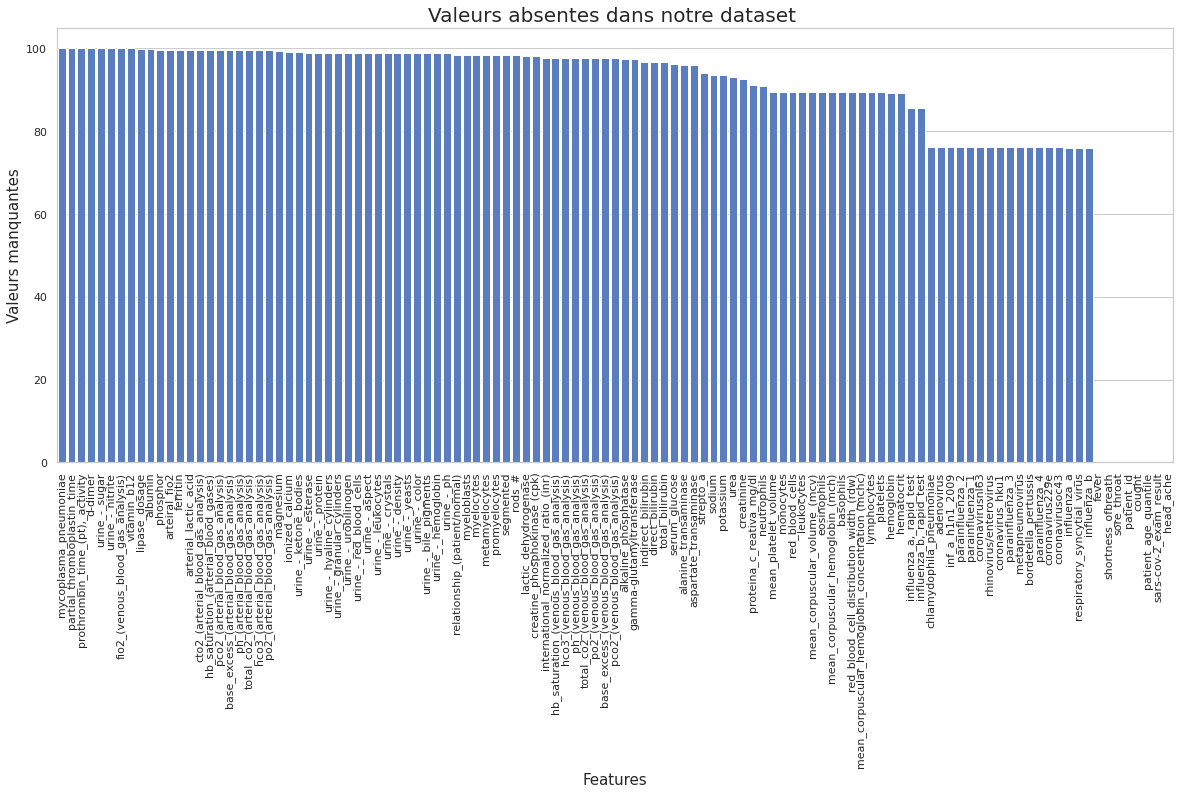

In [15]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(20,8))

sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Pourcentage", data=dataset_missing_values, color="b")

plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Valeurs manquantes', fontsize=15)
plt.title('Valeurs absentes dans notre dataset ', fontsize=20)

In [ ]:
dataset_missing_values[dataset_missing_values['Not Null'] <= 10]

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257


In [ ]:
data.drop(columns=['d-dimer','partial_thromboplastin_time','mycoplasma_pneumoniae','prothrombin_time_(pt),_activity','urine_-_sugar','fio2_(venous_blood_gas_analysis)','urine_-_nitrite','vitamin_b12','lipase_dosage'], inplace=True)

In [ ]:
data = data.fillna(0)

In [ ]:
data.replace('not_detected', 0, inplace=True)
data.replace('detected', 1, inplace=True)
data.replace('absent', 0, inplace=True)
data.replace('present', 1, inplace=True)
data.replace('negative', 0, inplace=True)
data.replace('positive', 1, inplace=True)

In [ ]:
corr_matrix = abs(data.corr())

In [ ]:
corr_target = corr_matrix["sars-cov-2_exam_result"]

In [ ]:
corr_target.sort_values(ascending = False)                                           

sars-cov-2_exam_result                              1.000000e+00
fever                                               5.893435e-01
sore_throat                                         5.773446e-01
cought                                              5.548469e-01
shortness_ofbreath                                  4.724318e-01
head_ache                                           4.009927e-01
leukocytes                                          1.088353e-01
platelets                                           1.064816e-01
patient_age_quantile                                7.524442e-02
rhinovirus/enterovirus                              7.463850e-02
monocytes                                           7.443121e-02
eosinophils                                         7.265897e-02
red_blood_cells                                     4.576615e-02
inf_a_h1n1_2009                                     4.403034e-02
mean_platelet_volume                                4.062155e-02
hemoglobin               

In [ ]:
relevant_features = ["platelets","leukocytes","eosinophils","monocytes","hemoglobin","cto2_(arterial_blood_gas_analysis)","pco2_(arterial_blood_gas_analysis)","fever","sore_throat","cought","shortness_ofbreath","head_ache"]

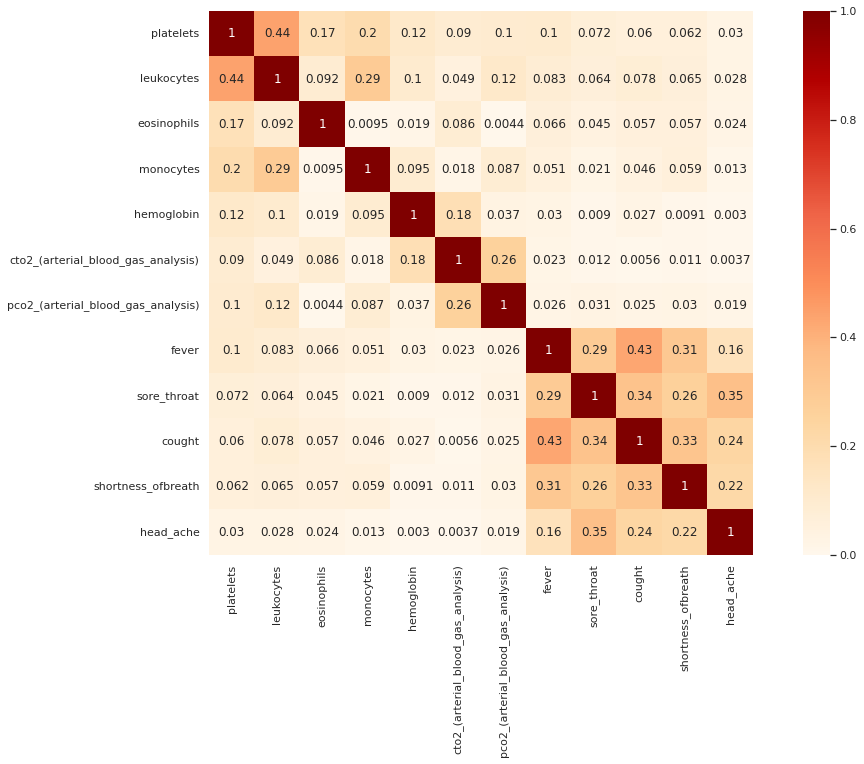

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(data[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

In [ ]:
target = data['sars-cov-2_exam_result']

features = data.select_dtypes(exclude=[object])
del(features['sars-cov-2_exam_result'])
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

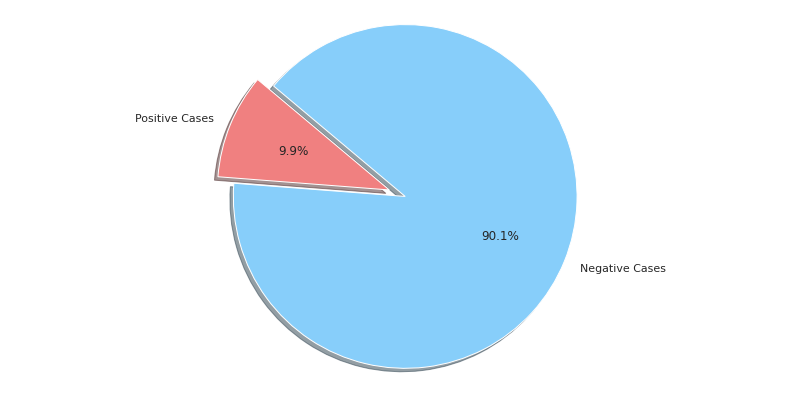

In [ ]:
#pourcentage des données pour chaque classe
dataset_negative = target == 0
dataset_positive = target == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
#application du smotenc pour le sur-échantillonnage
sm = SMOTENC(random_state=42,categorical_features=[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,39,40,65,66])
X_res, y_res = sm.fit_resample(X_train, y_train)

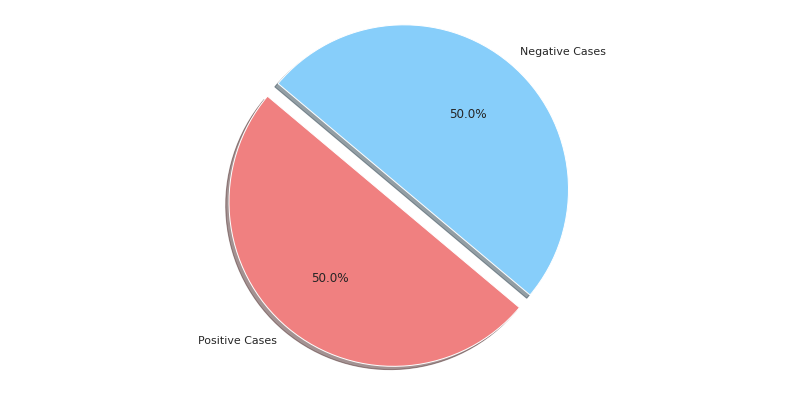

In [ ]:
#pourcentage des données pour chaque classe après sur-échantillonnage
dataset_negative = y_res == 0
dataset_positive = y_res == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
param_grid = {'n_neighbors' : np.arange(1,50)}
knn =  KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_res,y_res)
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 6}
The best score we have achieved is: 0.9143022535077815


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_res,y_res)
y_Knn = KNN.predict(X_test)
score_Knn = KNN.score(X_test, y_test)
score_Knn

0.9474616292798111

In [ ]:
cr_Knn = classification_report(y_test, y_Knn)
print(cr_Knn)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1527
           1       0.68      0.87      0.77       167

    accuracy                           0.95      1694
   macro avg       0.83      0.91      0.87      1694
weighted avg       0.96      0.95      0.95      1694



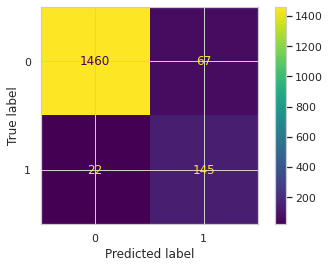

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN, X_test, y_test)  
plt.show()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_res, y_res)
print(grid.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   2.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   2.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   2.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   2.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   2.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.919 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.919 total time=   0.9s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.918 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   2.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
clf = svm.SVC(kernel='rbf', C=100, gamma= 0.001)
clf.fit(X_res, y_res)
y_svm = clf.predict(X_test)
score_Svm = clf.score(X_test, y_test)
score_Svm

0.9474616292798111

In [ ]:
cr_Svm = classification_report(y_test, y_svm)
print(cr_Svm)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1527
           1       0.67      0.92      0.78       167

    accuracy                           0.95      1694
   macro avg       0.83      0.94      0.87      1694
weighted avg       0.96      0.95      0.95      1694



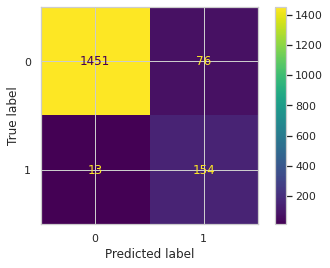

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)
print(grid_clf_acc.best_params_)

In [ ]:
logreg = LogisticRegression(C = 10, penalty = 'l2')
logreg.fit(X_res,y_res)

y_logreg=logreg.predict(X_test)
score_Logreg = logreg.score(X_test, y_test)
score_Logreg


0.948642266824085

In [ ]:
cr_Logreg =classification_report(y_test, y_logreg) 
print(cr_Logreg)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1527
           1       0.68      0.92      0.78       167

    accuracy                           0.95      1694
   macro avg       0.83      0.93      0.87      1694
weighted avg       0.96      0.95      0.95      1694



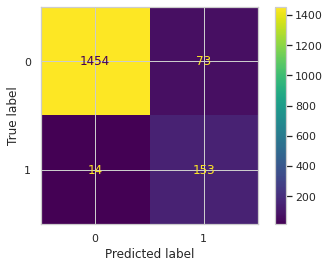

In [ ]:
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)
print(mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'activation': 'tanh', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(50,75,100),activation = 'tanh',random_state=123,learning_rate='adaptive',solver='sgd')
classifier.fit(X_train,y_train)
y_Mlp=classifier.predict(X_test)
score_Mlp=classifier.score(X_test,y_test)
score_Mlp

0.9669421487603306

In [ ]:
cr_Mlp = classification_report(y_test, y_Mlp)
print(cr_Mlp)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.84      0.82      0.83       167

    accuracy                           0.97      1694
   macro avg       0.91      0.90      0.91      1694
weighted avg       0.97      0.97      0.97      1694



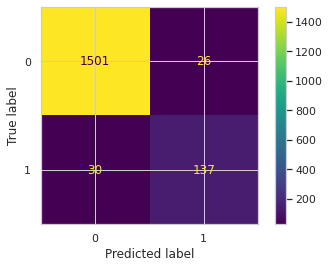

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:
model_bc = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators= 100)
model_bc.fit(X_res,y_res)
score_bc = model_bc.score(X_test,y_test)
y_pred_bc = model_bc.predict(X_test)
print(score_bc)
print(classification_report(y_test, y_pred_bc))

0.9445100354191264
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1527
           1       0.67      0.88      0.76       167

    accuracy                           0.94      1694
   macro avg       0.83      0.92      0.86      1694
weighted avg       0.95      0.94      0.95      1694



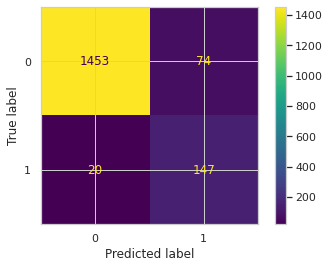

In [ ]:
plot_confusion_matrix(model_bc, X_test, y_test)  
plt.show()

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 1000, max_depth=150)
model_rf.fit(X_res,y_res)
score_rf =model_rf.score(X_test,y_test)
y_pred_rf = model_rf.predict(X_test)
print(score_rf)
print(classification_report(y_test, y_pred_rf))

0.9527744982290437
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1527
           1       0.72      0.85      0.78       167

    accuracy                           0.95      1694
   macro avg       0.85      0.91      0.88      1694
weighted avg       0.96      0.95      0.95      1694



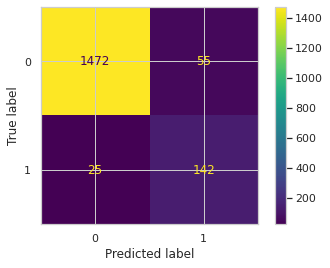

In [ ]:
plot_confusion_matrix(model_rf, X_test, y_test)  
plt.show()

In [ ]:
model_gbc = GradientBoostingClassifier(n_estimators= 100)
model_gbc.fit(X_res,y_res)
y_prd_g = model_gbc.predict(X_test)
score_gbc = model_gbc.score(X_test,y_test)
print(score_gbc)
print(classification_report(y_test, y_prd_g))

0.9580873671782763
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1527
           1       0.73      0.92      0.81       167

    accuracy                           0.96      1694
   macro avg       0.86      0.94      0.89      1694
weighted avg       0.96      0.96      0.96      1694



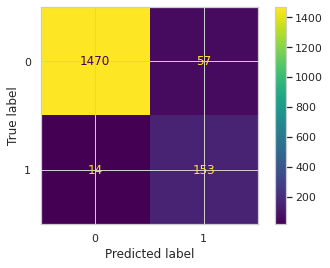

In [ ]:
plot_confusion_matrix(model_gbc, X_test, y_test)  
plt.show()

In [ ]:
model = StackingClassifier([('KNN',logreg),('SVM',clf),('mlp',classifier)],final_estimator=AdaBoostClassifier())
model.fit(X_res,y_res)
score_sc =model.score(X_test,y_test)
y_prrd = model.predict(X_test)
print(score_sc)
print(classification_report(y_test, y_prrd))

0.9498229043683589
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1527
           1       0.68      0.92      0.78       167

    accuracy                           0.95      1694
   macro avg       0.84      0.93      0.88      1694
weighted avg       0.96      0.95      0.95      1694



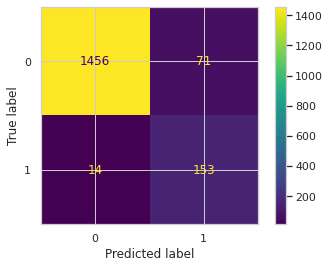

In [ ]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()